# In the Cliff Walking game, the player has a 30% chance of falling off the cliff. if the player takes 10 steps, what is the probability that this player will fall off the cliff 2 times?

The assumptions I will are that the player is has a 30% chance of falling off the cliff. The random variables are the 10 steps that the player takes, and if the player will fall off or not. 
one trial of the simulation will be the player taking 50 steps and seeing how many times they fell. the success will be if that player falls off the cliff 2 times, and a failure will be if they fall off the cliff less then 2 times or more.

In [1]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install ale-py
!pip install autorom[accept-rom-license]
!pip install "gymnasium[toy-text]"

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for gymnasium from https://files.pythonhosted.org/packages/ef/73/85bc0412f15388e3068dc93331c858df6c8fc635b1e3cb30c7f7070ca481/gymnasium-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for farama-notifications>=0.0.1 from https://files.pythonhosted.org/packages/05/2c/ffc08c54c05cdce6fbed2aeebc46348dbe180c6d2c541c7af7ba0aa5f5f8/Farama_Notifications-0.0.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 951.1/951.1 kB 13.2 MB/s eta 0:00:000:00:01
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for ale_py>=0.9 from https://files.pythonhosted.org/packages/3d/92/623e8b3157fdd39a0d78026a1c2727c9215d882d67bfb72697661c7dba6f/ale_py-0.11.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metad

In [1]:
import ale_py
import gymnasium as gym
gym.register_envs(ale_py)

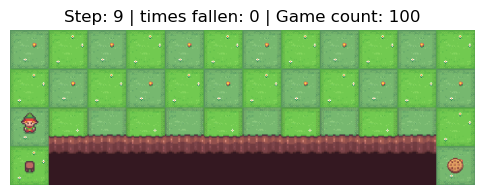

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


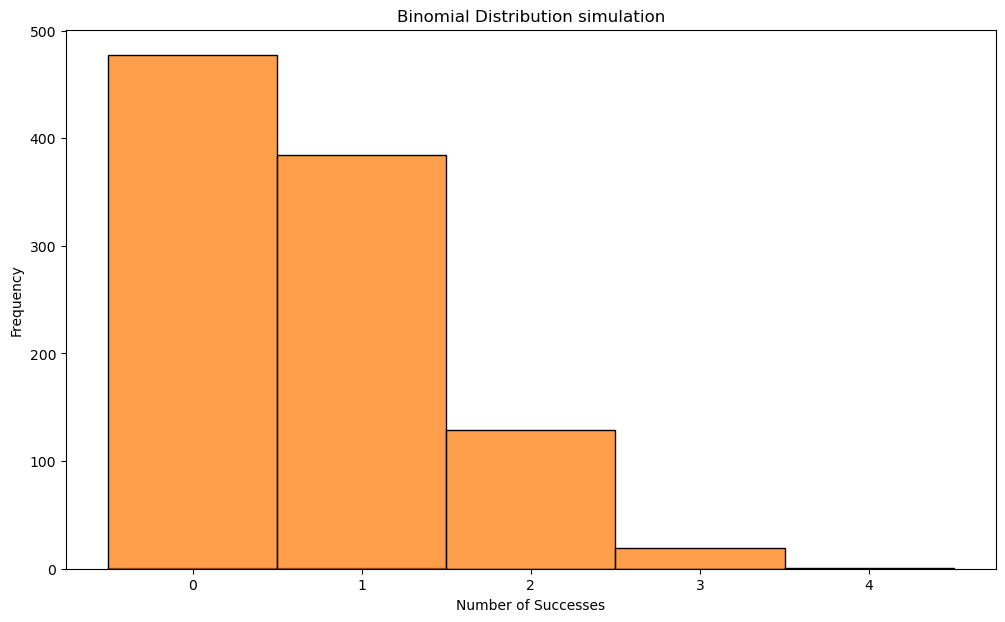

In [8]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

env = gym.make('CliffWalking-v1', render_mode='rgb_array')
observation, info = env.reset()

fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')

prev_o = observation
times_fallen = 0
game_count = 0
tot_step = 0
falls_p_game = []
for game_count in range(101)  :
    observation, info = env.reset()
    prev_o = observation
    times_fallen = 0
    for step in range(10):
        
        action = env.action_space.sample()
        prev_o = observation
        observation, reward, terminated, truncated, info = env.step(action)
        
        if prev_o != 36 and observation == 36:
            times_fallen += 1
        
        clear_output(wait=True)
        ax.clear()
        ax.imshow(env.render())
        ax.set_title(f"Step: {step} | times fallen: {times_fallen:.0f} | Game count: {game_count}")
        ax.axis('off')
        
        display(fig)
        
        time.sleep(0.03) 
        
        if truncated or terminated:
            observation, info = env.reset()
            prev_o = observation
    falls_p_game.append(times_fallen)        
    game_count += 1
    tot_step += 10
plt.close()
env.close()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

falls_array = np.array(falls_p_game)
ave_falls_per_game = np.mean(falls_array)
emp_prob_2 = np.sum(falls_array == 2) / 100
theo_prob_2 = stats.binom.pmf(k=2, n=10, p=0.3)  

per_s_prob = np.mean(falls_array) / 10

b_s = np.random.binomial(n=10, p= per_s_prob, size=tot_step) 
plt.figure(figsize=(12, 7))
ax = sns.histplot(falls_array, discrete=True, stat='probability', kde=False)

sns.histplot(b_s, discrete=True)
plt.title('Binomial Distribution simulation')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.show()

In [9]:
print(emp_prob_2)
print(ave_falls_per_game)

0.14
0.693069306930693


The theoretical binomial probability is 23%, and based on my simulation, the empirical probability based on my simulation is 13%. The mean of the average falls in my simulation is around 0.693, so the agent in my simulation isn't falling very often in 10 steps. 